In [1]:
#!pip install pandas numpy matplotlib seaborn sklearn pyod

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

# Load dataset

In [170]:
data = pd.read_csv("Classification/cleanedartistsongglobal.csv")
datatest = pd.read_csv("Classification/cleanedartistsongglobaltest.csv")

In [7]:
# data = pd.read_csv('Classification/all_files_globalv1.csv')

In [133]:
# data

# Exploratory Data Analysis (EDA)

In [11]:
# data.info()

In [135]:
# compute the mean value of all numeric columns in data
world_yearly_median = data.select_dtypes(include=np.number).median()
world_median_data = pd.DataFrame(world_yearly_median[:-1])
world_median_data

,0
Max Streams per Song,8.184227e+06
Min Streams per Song,5.034268e+06
Total Streams per Song,2.871181e+07
Mean Streams per Song,6.769999e+06
Min Position per Song,7.500000e+01
MaxMin Difference Position,8.300000e+01
MaxMin Difference Streams,2.283444e+06
MaxMin Ratio Position,2.000000e+00
MaxMin Ratio Streams,1.479240e+00
Max Song Count per artist,4.500000e+01


In [137]:
# reset index and name columns
world_median_data.reset_index(inplace=True)
world_median_data.columns = ['year', 'median']

In [139]:
world_median_data.describe()

,median
count,1.400000e+01
mean,4.109068e+06
std,7.716943e+06
min,1.479240e+00
25%,5.250000e+01
50%,1.290000e+02
75%,6.165621e+06
max,2.871181e+07


In [141]:
percentile_95 = np.percentile(world_median_data['median'], 95)
percentile_5 = np.percentile(world_median_data['median'], 5)

greater_than_95 = (world_median_data[['median']] > percentile_95)
smaller_than_5 = (world_median_data[['median']] < percentile_5)

# create column named colors to store the color of each point based on the condition above 
# world_median_data['colors'] = np.where(greater_than_95,'r', np.where(smaller_than_5,'r','b'))

world_median_data

,year,median
0,Max Streams per Song,8.184227e+06
1,Min Streams per Song,5.034268e+06
2,Total Streams per Song,2.871181e+07
3,Mean Streams per Song,6.769999e+06
4,Min Position per Song,7.500000e+01
5,MaxMin Difference Position,8.300000e+01
6,MaxMin Difference Streams,2.283444e+06
7,MaxMin Ratio Position,2.000000e+00
8,MaxMin Ratio Streams,1.479240e+00
9,Max Song Count per artist,4.500000e+01


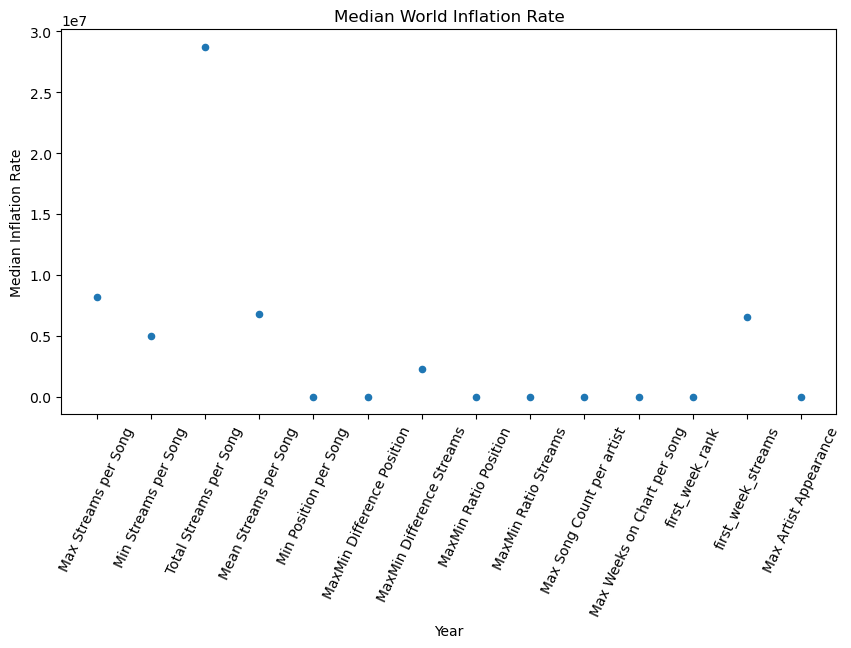

In [143]:
# plot scatter plot of the data with colors based on colors column
ax = world_median_data.plot.scatter(x='year', 
                               y='median', 
#                                c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                               figsize=(10, 5),
                               title='Median World Inflation Rate',
                               xlabel='Year',
                               ylabel='Median Inflation Rate')

plt.xticks(rotation=65);

In [23]:
dftypes = pd.DataFrame(data.dtypes).reset_index()
dftypes.columns = ["col", "dtype"]

In [25]:
# dftypes

In [27]:
theints = dftypes[dftypes["dtype"]=="int64"]
thefloats = dftypes[dftypes["dtype"]=="float64"]

In [29]:
# thefloats

In [33]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Apply Label Encoding to the column
# data['source_encoded'] = le.fit_transform(data['source'])

In [39]:
relcols = list(data.columns)
relcols1 = list(set(relcols) - set(['main_artist', 'track_name']))

In [41]:
# relevant_df = data[["track_name", "main_artist", 'Year', 'rank', 'artistAppearanceCount', 'weeks_on_chart', "isTopTen", "streams", 'source_encoded']]
# maxweekspersong = relevant_df.groupby(["track_name", "main_artist"])["weeks_on_chart"].max()

In [43]:
# startrankpersong = relevant_df.groupby(["track_name", "main_artist"])["rank"].first()

In [45]:
# maxweekspersong = maxweekspersong.reset_index()
# startrankpersong = startrankpersong.reset_index()

In [47]:
# relevant_dfplusmax = relevant_df.merge(maxweekspersong, left_on=["track_name", "main_artist", "weeks_on_chart"], right_on=["track_name", "main_artist", "weeks_on_chart"], how="inner")
# relevant_dfplusmin = relevant_df.merge(startrankpersong, left_on=["track_name", "main_artist", "rank"], right_on=["track_name", "main_artist", "rank"], how="inner")

In [49]:
# allrelevantdf = relevant_dfplusmin[["track_name", "main_artist", "rank", "artistAppearanceCount", "isTopTen", "streams", 'source_encoded']].merge(relevant_dfplusmax[["track_name", "main_artist", "weeks_on_chart"]], left_on=["track_name", "main_artist"], right_on=["track_name", "main_artist"], how="inner")

In [51]:
# allrelevantdf

In [53]:
# allrelevantdf.columns = ["track_name",	"main_artist", "start_rank", "artistAppearanceCount", "isTopTen", "streams", 'source_encoded', "max_weeks_on_chart"]

In [55]:
# allrelevantdf1 = allrelevantdf.groupby(["track_name", "main_artist", "start_rank", "max_weeks_on_chart"])["artistAppearanceCount"].first()
# allrelevantdf1 = allrelevantdf1.reset_index()

In [57]:
# allrelevantdf2 = allrelevantdf.groupby(["track_name", "main_artist", "start_rank", "max_weeks_on_chart"])["isTopTen"].first()
# allrelevantdf2 = allrelevantdf2.reset_index()

In [59]:
# allrelevantdf3 = allrelevantdf.groupby(["track_name", "main_artist", "start_rank", "max_weeks_on_chart"])["streams"].first()
# allrelevantdf3 = allrelevantdf3.reset_index()

In [61]:
# allrelevantdf4 = allrelevantdf.groupby(["track_name", "main_artist", "start_rank", "max_weeks_on_chart"])["source_encoded"].first()
# allrelevantdf4 = allrelevantdf4.reset_index()

In [63]:
# allrelevantdf1 = allrelevantdf1.drop_duplicates()
# allrelevantdf2 = allrelevantdf2.drop_duplicates()
# allrelevantdf3 = allrelevantdf3.drop_duplicates()
# allrelevantdf4 = allrelevantdf4.drop_duplicates()

In [65]:
# allrelevantdf1.shape, allrelevantdf2.shape, allrelevantdf3.shape, allrelevantdf4.shape

In [67]:
# allrelevantdf1.columns, allrelevantdf2.columns, allrelevantdf3.columns, allrelevantdf4.columns

In [69]:
# relevant_dfallvf = allrelevantdf1.merge(allrelevantdf2, left_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], right_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], how="inner")
# relevant_dfallvff = relevant_dfallvf.merge(allrelevantdf3, left_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], right_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], how="inner")
# relevant_dfallvfff = relevant_dfallvff.merge(allrelevantdf4, left_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], right_on=["track_name", "main_artist", "start_rank", "max_weeks_on_chart"], how="inner")

In [71]:
# relevant_dfallvfff

In [69]:
# relevant_dfallvfff.columns = ["track_name", "main_artist", "start_rank", "max_weeks_on_chart", "song_entry_artistAppearanceCount", "isentrytopten", "start_streams", "source_encoded"]

In [73]:
relevant_dfallvfff = data[relcols1]
relevant_dfallvfff.describe()

,Mean Streams per Song,MaxMin Difference Streams,Min Streams per Song,MaxMin Ratio Streams,first_week_streams,MaxMin Difference Position,Max Song Count per artist,encoded_source,Max Weeks on Chart per song,MaxMin Ratio Position,Max Artist Appearance,Max Streams per Song,first_week_rank,Total Streams per Song,Min Position per Song
count,5.100000e+03,5.100000e+03,5.100000e+03,5100.000000,5.100000e+03,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5.100000e+03,5100.000000,5.100000e+03,5100.000000
mean,7.543263e+06,5.715704e+06,5.514359e+06,2.154779,9.189468e+06,80.925882,68.046078,460.508039,13.911373,8.732451,321.214510,1.123006e+07,106.570000,1.248606e+08,83.792157
std,3.520084e+06,8.616374e+06,2.363366e+06,1.701192,7.556295e+06,68.451883,68.939691,273.602148,24.665918,24.395124,416.732837,8.973342e+06,61.446673,2.590689e+08,58.417578
min,2.525159e+06,0.000000e+00,2.525159e+06,1.000000,2.525159e+06,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.525159e+06,1.000000,2.525159e+06,1.000000
25%,5.298893e+06,0.000000e+00,4.344178e+06,1.000000,5.027342e+06,0.000000,18.000000,186.000000,1.000000,1.000000,31.000000,5.711483e+06,52.000000,8.342279e+06,31.000000
50%,6.769999e+06,2.283444e+06,5.034268e+06,1.479240,6.542738e+06,83.000000,45.000000,486.000000,4.000000,2.000000,147.000000,8.184227e+06,111.000000,2.871181e+07,75.000000
75%,8.985044e+06,7.790650e+06,5.998727e+06,2.574116,1.030076e+07,143.000000,96.000000,712.000000,16.000000,5.270270,430.750000,1.332750e+07,163.000000,1.198896e+08,131.000000
max,5.694396e+07,8.392916e+07,4.621337e+07,15.227683,9.603262e+07,199.000000,329.000000,913.000000,329.000000,200.000000,1766.000000,1.151569e+08,200.000000,3.547634e+09,200.000000


In [172]:
relevant_dfallvffftest = datatest[relcols1]
relevant_dfallvffftest.describe()

,Mean Streams per Song,MaxMin Difference Streams,Min Streams per Song,MaxMin Ratio Streams,first_week_streams,MaxMin Difference Position,Max Song Count per artist,encoded_source,Max Weeks on Chart per song,MaxMin Ratio Position,Max Artist Appearance,Max Streams per Song,first_week_rank,Total Streams per Song,Min Position per Song
count,1.267000e+03,1.267000e+03,1.267000e+03,1267.000000,1.267000e+03,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1.267000e+03,1267.000000,1.267000e+03,1267.000000
mean,1.496296e+07,5.974554e+04,1.493308e+07,1.005708,1.496296e+07,1.043410,1.032360,192.770324,1.680347,1.018944,382.287293,1.499283e+07,97.034728,1.517499e+07,96.513023
std,9.611724e+06,5.713387e+05,9.620400e+06,0.052145,9.616014e+06,8.787046,0.177024,110.735699,5.204927,0.174687,544.963033,9.611534e+06,63.312912,9.707295e+06,63.218149
min,7.622267e+06,0.000000e+00,7.622267e+06,1.000000,7.622267e+06,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.622267e+06,1.000000,7.622267e+06,1.000000
25%,9.255256e+06,0.000000e+00,9.247479e+06,1.000000,9.258150e+06,0.000000,1.000000,77.000000,1.000000,1.000000,11.000000,9.276577e+06,37.000000,9.276577e+06,37.000000
50%,1.145159e+07,0.000000e+00,1.138178e+07,1.000000,1.143049e+07,0.000000,1.000000,211.000000,1.000000,1.000000,114.000000,1.145159e+07,92.000000,1.153231e+07,92.000000
75%,1.692138e+07,0.000000e+00,1.685385e+07,1.000000,1.692138e+07,0.000000,1.000000,292.500000,1.000000,1.000000,454.000000,1.701797e+07,156.500000,1.775493e+07,155.000000
max,1.028784e+08,8.079002e+06,1.028784e+08,1.637916,1.028784e+08,112.000000,2.000000,367.000000,135.000000,3.500000,1910.000000,1.028784e+08,200.000000,1.028784e+08,200.000000


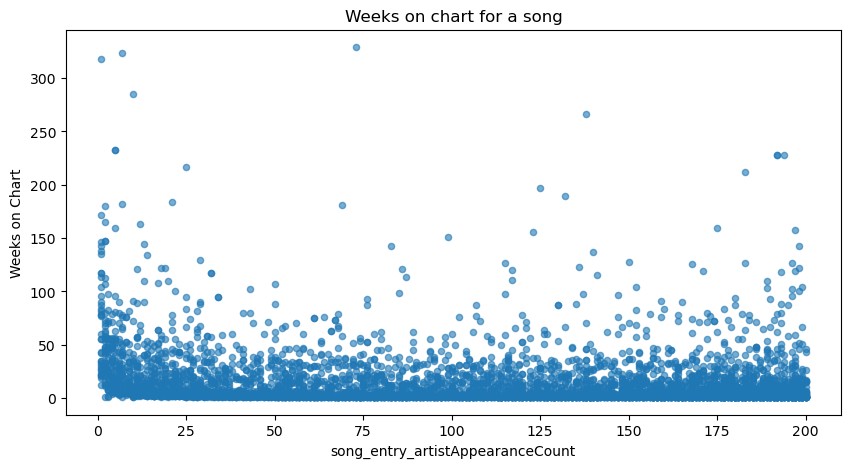

In [75]:
ax = relevant_dfallvfff.plot.scatter(x='first_week_rank', y='Max Weeks on Chart per song', 
#                             c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                            alpha=.6, figsize=(10, 5),
                            title='Weeks on chart for a song',
                            xlabel='song_entry_artistAppearanceCount', ylabel='Weeks on Chart')

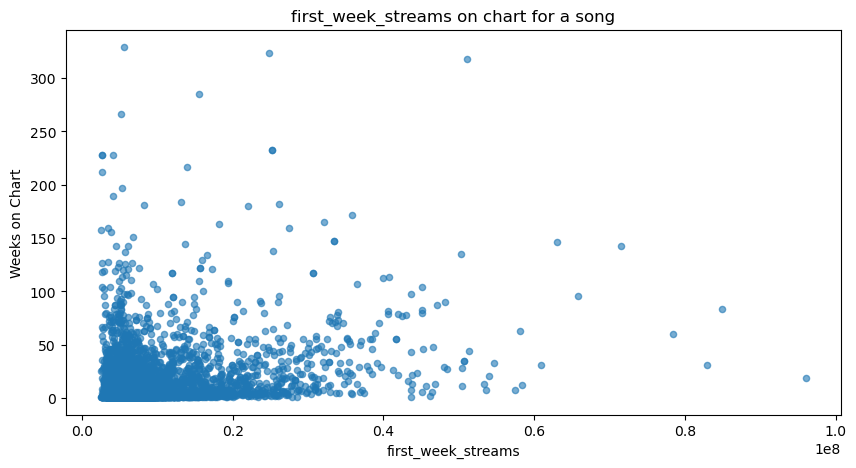

In [79]:
ax = relevant_dfallvfff.plot.scatter(x='first_week_streams', y='Max Weeks on Chart per song', 
#                             c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                            alpha=.6, figsize=(10, 5),
                            title='first_week_streams on chart for a song',
                            xlabel='first_week_streams', ylabel='Weeks on Chart')

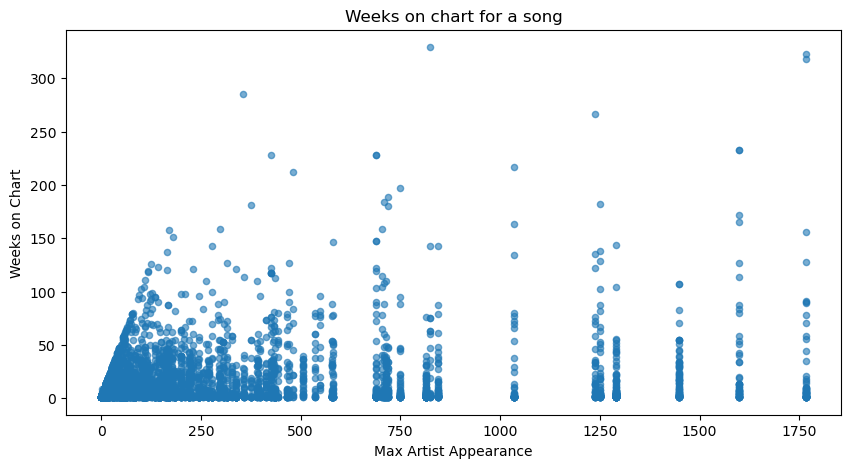

In [81]:
ax = relevant_dfallvfff.plot.scatter(x='Max Artist Appearance', y='Max Weeks on Chart per song', 
#                             c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                            alpha=.6, figsize=(10, 5),
                            title='Weeks on chart for a song',
                            xlabel='Max Artist Appearance', ylabel='Weeks on Chart')

In [83]:
relevant_dfallvfff.columns

Index(['Mean Streams per Song', 'MaxMin Difference Streams',
       'Min Streams per Song', 'MaxMin Ratio Streams', 'first_week_streams',
       'MaxMin Difference Position', 'Max Song Count per artist',
       'encoded_source', 'Max Weeks on Chart per song',
       'MaxMin Ratio Position', 'Max Artist Appearance',
       'Max Streams per Song', 'first_week_rank', 'Total Streams per Song',
       'Min Position per Song'],
      dtype='object')

In [85]:
relevant_dfallvfff = relevant_dfallvfff[['first_week_streams', 'Max Song Count per artist','encoded_source', 'Max Weeks on Chart per song', 'Max Artist Appearance','first_week_rank', 'Total Streams per Song','Min Position per Song']]

# Benchmark Linear Regression model 

In [87]:
LinearRegression_model = LinearRegression()
# LinearRegression_model.fit(data[['Year', 'rank', 'trackAppearanceCount', 'artistAppearanceCount']], data[['weeks_on_chart']])
# LinearRegression_model.fit(relevant_dfallvfff[['start_rank', 'song_entry_artistAppearanceCount', "isentrytopten", "start_streams", "source_encoded"]], allrelevantdf1[['max_weeks_on_chart']])
# LinearRegression_model.fit(relevant_dfallvfff[['start_rank', 'song_entry_artistAppearanceCount']], allrelevantdf1[['max_weeks_on_chart']])
# LinearRegression_model.fit(relevant_dfallvfff[['start_rank', 'song_entry_artistAppearanceCount', "isentrytopten"]], relevant_dfallvfff[['max_weeks_on_chart']])
LinearRegression_model.fit(relevant_dfallvfff[['first_week_streams', 'Max Song Count per artist','encoded_source', 'Max Artist Appearance','first_week_rank', 'Total Streams per Song','Min Position per Song']], relevant_dfallvfff['Max Weeks on Chart per song'])

LinearRegression()

In [194]:
# # reg_prediction = LinearRegression_model.predict(new_data[['Year', 'rank','trackAppearanceCount', 'artistAppearanceCount']])
# reg_prediction = LinearRegression_model.predict(relevant_dfallvfff[['start_rank', 'song_entry_artistAppearanceCount', "isentrytopten", "start_streams", "source_encoded"]])
# reg_prediction = LinearRegression_model.predict(relevant_dfallvfff[['start_rank', 'song_entry_artistAppearanceCount', "isentrytopten"]])
reg_prediction = LinearRegression_model.predict(relevant_dfallvfff[['first_week_streams', 'Max Song Count per artist','encoded_source', 'Max Artist Appearance','first_week_rank', 'Total Streams per Song','Min Position per Song']])

In [196]:
reg_prediction

array([ 1.49533917,  8.09598205,  2.80282836, ...,  0.13817436,
        1.30177601, 41.39540445])

In [198]:
reg_pred_list = []
for val in reg_prediction:
    reg_pred_list.append(math.floor(val))
# print(reg_pred_list)#, data['weeks_on_chart'].tolist()

In [200]:
# resdf = data.head(100)
resdf = data[["track_name", "main_artist", 'Max Weeks on Chart per song']]
resdf['predictions'] = reg_pred_list

C:\Users\lkhum\AppData\Local\Temp\ipykernel_16340\2130711856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['predictions'] = reg_pred_list


In [202]:
acc = (resdf['Max Weeks on Chart per song']==resdf.predictions).mean()

In [204]:
print("%.2f%%"%(acc*100))

16.78%


In [206]:
resdf.head(5)

,track_name,main_artist,Max Weeks on Chart per song,predictions
0,Doja,$NOT,1,1
1,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,7,8
2,Nxde,(G)I-DLE,4,2
3,Queencard,(G)I-DLE,1,0
4,TOMBOY,(G)I-DLE,2,0


In [109]:
stop

NameError: name 'stop' is not defined

# Isolation Forest

In [145]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(.05))

In [147]:
model_IF.fit(world_median_data[['median']])
world_median_data['IF_anomaly_scores'] = model_IF.decision_function(world_median_data[['median']])
world_median_data['IF_anomaly'] = model_IF.predict(world_median_data[['median']])
world_median_data.head()

,year,median,IF_anomaly_scores,IF_anomaly
0,Max Streams per Song,8184227.00,0.081749,1
1,Min Streams per Song,5034267.50,0.128289,1
2,Total Streams per Song,28711809.50,-0.147840,-1
3,Mean Streams per Song,6769999.27,0.187233,1
4,Min Position per Song,75.00,0.287798,1


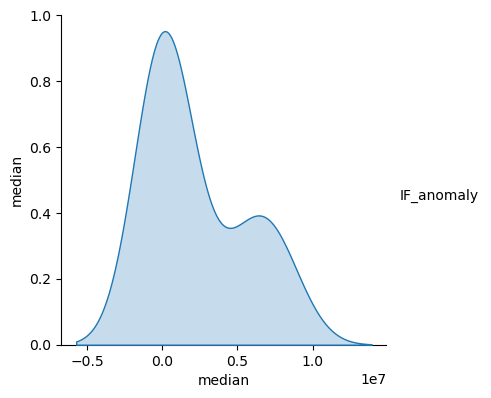

In [149]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(world_median_data, 
             vars=['median'], 
             hue='IF_anomaly', 
             palette=palette,
             height=4);

C:\Users\lkhum\AppData\Local\Temp\ipykernel_16340\3066951920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IF_anomaly',


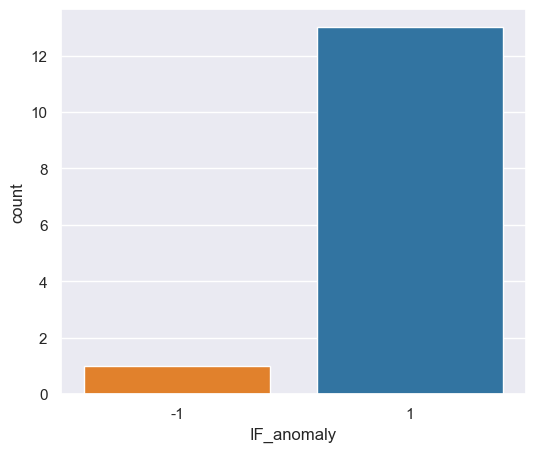

In [151]:
# phow many anomalies were detected by isolation forest?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='IF_anomaly', 
              data=world_median_data, 
              palette=palette);

# Local Outlier Factor

In [154]:
from sklearn.neighbors import LocalOutlierFactor 

# note how predictions changes when we change the contamination and/or n_neighbors parameters
model_LOF = LocalOutlierFactor(n_neighbors=10)

In [156]:
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

LOF_predictions = model_LOF.fit_predict(world_median_data[['median']])
n_errors = (LOF_predictions != 1).sum()
model_LOF_scores = model_LOF.negative_outlier_factor_

In [158]:
LOF_predictions

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [160]:
world_median_data['LOF_anomaly_scores'] = model_LOF_scores
world_median_data['LOF_anomaly'] = LOF_predictions
world_median_data.describe()

,median,IF_anomaly_scores,IF_anomaly,LOF_anomaly_scores,LOF_anomaly
count,1.400000e+01,14.000000,14.000000,14.000000,14.000000
mean,4.109068e+06,0.190720,0.857143,-1.229138,0.857143
std,7.716943e+06,0.123334,0.534522,0.814466,0.534522
min,1.479240e+00,-0.147840,-1.000000,-4.053942,-1.000000
25%,5.250000e+01,0.142120,1.000000,-1.025188,1.000000
50%,1.290000e+02,0.235183,1.000000,-0.988292,1.000000
75%,6.165621e+06,0.279191,1.000000,-0.988290,1.000000
max,2.871181e+07,0.287798,1.000000,-0.988289,1.000000


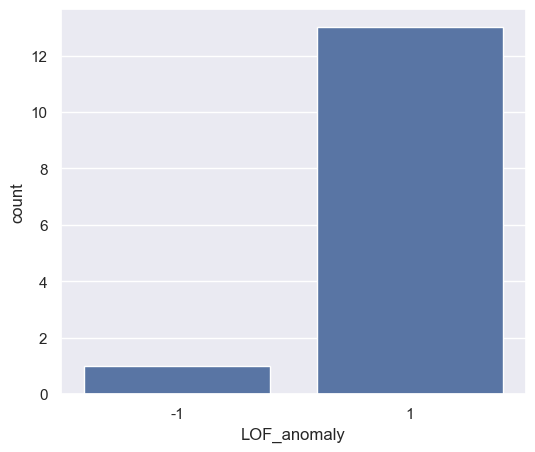

In [162]:
# phow many anomalies were detected by Local Outlier Factor?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='LOF_anomaly', 
              data=world_median_data);

# Model Visual Comparison

C:\Users\lkhum\anaconda3\Lib\site-packages\matplotlib\text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\lkhum\anaconda3\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\lkhum\anaconda3\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


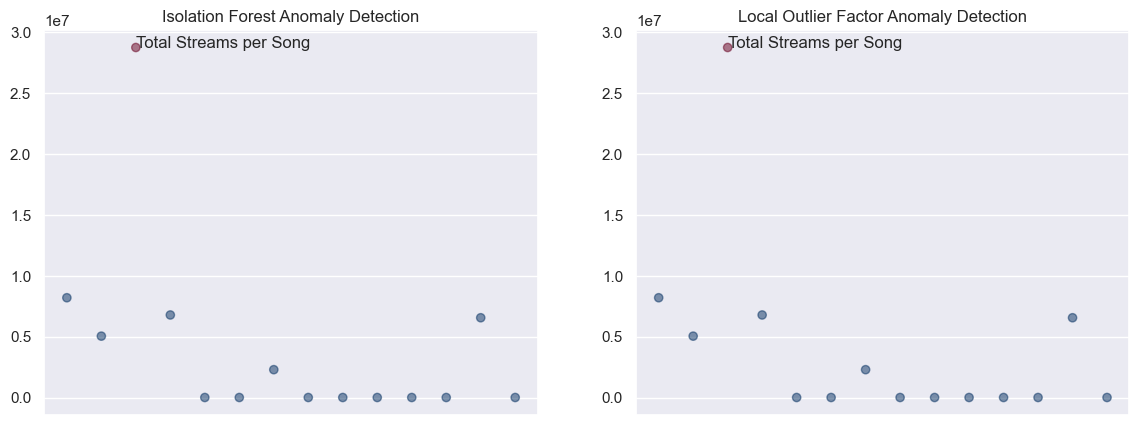

In [166]:
# plt.style.use("seaborn")

# Plot two scatterplots coloring by the two different anomaly predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=False)

ax1.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['IF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax1.set_title("Isolation Forest Anomaly Detection")

# label anomalies in ax1 with year value
for anomaly in world_median_data[world_median_data['IF_anomaly'] == -1]['year']:
    ax1.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.4))

ax2.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['LOF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in world_median_data[world_median_data['LOF_anomaly'] == -1]['year']:
    ax2.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.2))

# hide x axis labels from axes
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
